# Построение графика по экспериментальным точкам

Пусть у нас мого экспериментальных точек. Очень много. Надо провести через них кривую (например, линию), чтобы она с наименьшим отклонением проходила через набор точек. Она может проходить через некоторые точки (не обязательно) и проходить недалеко от других точек.

Почему нельзя при этом интерполировать?

* очень много точек, значит интерполяционный полином высокой степени и могут начаться биения,
* не нужно проводить сплайны, потому что экспериментальные точки содержат ошибки измерения и нужно провести кривую в пределах погрешностей эксперимента,
* пытаемся найти форму зависимости теоретической кривой по экспериментальным данным (это прямая, парабола, экспонента или что-то другое?)

## Постановка задачи

Даны экспериментальные точки:

* значения по горизонтальной оси, будем называть ее Х. Лежат в списке х или в файле `xdata.txt`
* значения по вертикальной оси, будем называть ее Y. Лежат в списке у или в файле `ydata.txt`
* знаем предполагаемую форму кривой (прямая, парабола, экспонента или другая кривая), но не знаем коэффиценты в функции этой кривой. Эта кривая называется "апроксимирующей фукнцией".

Коэффициенты этой апроксимирсимирующей функции мы и будем искать так, чтобы отклонение ее от экспериментальных точек было минимальным. Это задача оптимизации и решается с помощью функции **curve_fit** из пакета **scipy.optimize**.

Будем искать минимальное квадратичное отклонение. [Почему берем квадратичное отклонение](lsqrt.md) и что это такое.

## Пример: построение произвольной функции по экспериментальным точкам

* читаем данные из файлов `xdata.txt` и `ydata.txt` в переменные x и y.
* опеределяем функцию, которая по координате х и коэффициентам b0, b1, b2 .. bn вычисляет значение y. Назовем функцию `f`.
* по набору экспериментальных точек х и у и заданной функции f вычисляем коэффициенты b0, b1, .. bn. Задача решена.
* рисуем график экспериментальных точек и найденной апроскимирующей функции.

Попробуем сначала на простой функции, параболе $x^2$

### import

Понадобыится curve_fit из пакета scipy.optimize и все для рисования графиков.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Читаем данные из фалов 

Сохраните эти данные в файлы в **той же директории, что ваша тетрадь**.

В файл `xdata.txt` положите числа. Это будут наши "эспериментальные данные".
```
-4.53349565537
-4.09365239181
-3.46164907362
-2.27536520922
-0.799518640116
0.258848610464
0.678142088827
1.67746174919
3.33979664705
3.87971285728
4.61988761783
```

В файл `ydata.txt` полжите числа
```
24.9934393435
16.0864373629
9.35597227962
4.40895322612
1.05652519476
0.0593537295658
1.07912259931
4.22402583041
8.77775630747
15.9549972433
24.9164389595
```

Не забудьте сохранить записанные данные (Save).

In [15]:
# читаем данные из файлов
x = np.fromfile('xdata.txt', np.float64, sep='\n')
y = np.fromfile('ydata.txt', np.float64, sep='\n')

Проверяем, что прочитали правильно.

In [16]:
print(x)
print(y)

[-4.53349566 -4.09365239 -3.46164907 -2.27536521 -0.79951864  0.25884861
  0.67814209  1.67746175  3.33979665  3.87971286  4.61988762]
[24.99343934 16.08643736  9.35597228  4.40895323  1.05652519  0.05935373
  1.0791226   4.22402583  8.77775631 15.95499724 24.91643896]


Проверяем, что количество х и у координат совпадают

In [17]:
len(x) == len(y)

True

### Нарисуем график с точками

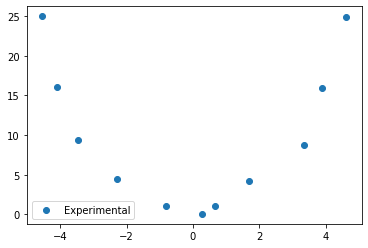

In [20]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='Experimental')
ax.legend()
plt.show()

### Определим вид функции f(x, коэффициенты)

График точек похож на график параболы. Значит будем искать параболу $b_0 + b_1 x + b_2 x^2$

In [21]:
# какой функцией будем апроксимировать
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

### Найдем коэффициенты этой функции

In [22]:
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, x, y)
beta_opt

array([-0.49958624,  0.08708628,  1.0987697 ])

In [24]:
b0, b1, b2 = beta_opt
print(f'b0={b0}')
print(f'b1={b1}')
print(f'b2={b2}')

b0=-0.4995862379309357
b1=0.08708627582393469
b2=1.098769698634771


К графику точек добавим график найденной параболы

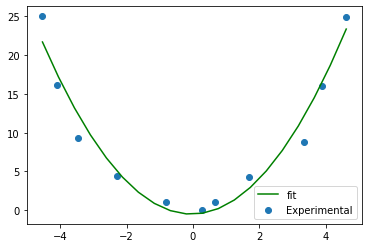

In [28]:
xx = np.linspace(min(x), max(x), 20)   # это х координаты точек для рисования графика, 20 штук
y_lsq = f(xx, b0, b1, b2)              # это y координаты точек для рисования графика, 

fig, ax = plt.subplots()
ax.scatter(x, y, label='Experimental')
ax.plot(xx, y_lsq, 'g-', label='fit')

ax.legend()
plt.show()

На самом деле "экспериментальные" точки получены из функции $x^2$ (в конце этой тетради написано как мы получили точки). Нарисуем и теоретическую кривую. Посмотрим как далеко отошла полученная парабола от начальной "чистой" параболы.

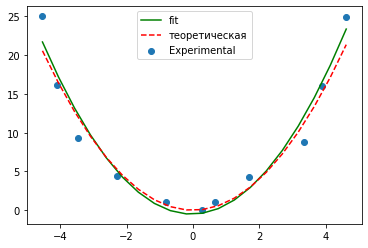

In [30]:
xx = np.linspace(min(x), max(x), 20)   # это х координаты точек для рисования графика, 20 штук
y_lsq = f(xx, b0, b1, b2)              # это y координаты точек для рисования графика, 
y_theor = xx**2                        # y координаты для рисования теоретической параболы

fig, ax = plt.subplots()
ax.scatter(x, y, label='Experimental')
ax.plot(xx, y_lsq, 'g-', label='fit')
ax.plot(xx, y_theor, 'r--', label='теоретическая')

ax.legend()
plt.show()

## Пример 2. scipy.optimize.fit для сложной функции

В примере апроксимируем данные функцией вида $$b_0 + b_1 e^{-b_2 * x^2}$$

In [ ]:
import numpy as np                 # для чтения точек
import matplotlib.pyplot as plt    # для рисования графикиков
from scipy.optimize import fit     # для поиска коэффициентов апроксимирующей фукнции

# читаем данные из файла
x=fromfile('x1_data.txt', float, sep='\n')
y=fromfile('y1_data.txt', float, sep='\n')

# задаем вид апроксимирующей функции
def myfunc(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

# вычисляем коэффициенты функции
beta_opt, beta_cov = curve_fit(f, x, y)
b0, b1, b2 = beta_opt

# рисуем график
xx = np.linspace(min(x), max(x), 100)    # берем много точек для рисования красивого графика
yy = myfunc(xx)

fig, ax = plt.subplots()
ax.scatter(x, y, label='Experimental')
ax.plot(xx, yy, 'g-', label='fit')
ax.legend()
plt.show()

# по точкам проводим прямую с помощью  np.linalg.lstsq

In [4]:
x = np.array([0, 1, 2, 3])
x

array([0, 1, 2, 3])

In [5]:
y = np.array([-1, 0.2, 0.9, 2.1])
y

array([-1. ,  0.2,  0.9,  2.1])

In [6]:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [11]:
m, c = np.linalg.lstsq(A, y)[0]
m, c

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(0.9999999999999999, -0.9499999999999997)

In [12]:
#help(np.linalg.lstsq)

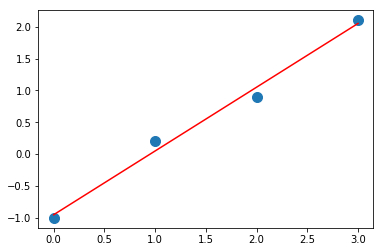

In [13]:
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.show()

In [14]:
from pylab import *
from scipy.linalg import *

читаем точки из файлов x.txt и y.txt, которые лежат в той же директории, что наш ipnb файл

In [15]:
# читаем данные из файлов
x=fromfile('x.txt', float, sep='\n')
y=fromfile('y.txt', float, sep='\n')

In [18]:
#x, y

In [32]:
# задаем вектор m = [x**2, x, E]
A = vstack((x**2, x, ones(len(x)))).T
#A = np.vstack([x, np.ones(len(x))]).T
A

array([[20.55258286, -4.53349566,  1.        ],
       [16.7579899 , -4.09365239,  1.        ],
       [11.98301431, -3.46164907,  1.        ],
       [ 5.17728684, -2.27536521,  1.        ],
       [ 0.63923006, -0.79951864,  1.        ],
       [ 0.0670026 ,  0.25884861,  1.        ],
       [ 0.45987669,  0.67814209,  1.        ],
       [ 2.81387792,  1.67746175,  1.        ],
       [11.15424164,  3.33979665,  1.        ],
       [15.05217185,  3.87971286,  1.        ],
       [21.3433616 ,  4.61988762,  1.        ]])

In [34]:
# находим коэффициенты при составляющих вектора m
s=lstsq(A,y)[0]
s

array([ 1.0987697 ,  0.08708628, -0.49958624])

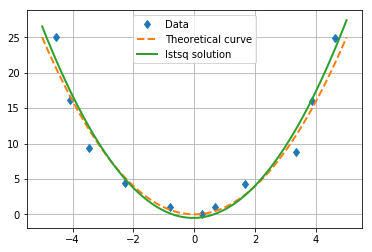

In [37]:
# на отрезке [-5,5]
x_prec=linspace(-5,5,101)

# рисуем точки
plot(x,y,'d')
# рисуем теоретическую кривую x<sup>2</sup>
plot(x_prec, x_prec**2,'--',lw=2)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec, s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)

grid()
legend(('Data', 'Theoretical curve', 'lstsq solution'), loc='upper center')
show()

In [28]:
#help(legend)

# Произвольная фукнция 
# f (x,b) = b0 + b1*exp(-b2*x**2)

In [39]:
# читаем данные из файлов
x=fromfile('x1_data.txt', float, sep='\n')
y=fromfile('y1_data.txt', float, sep='\n')

In [53]:
# какой функцией будем апроксимировать
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
#def f1(x, barr):
#    return barr[0] + barr[1] * np.exp(-barr[2] * x**2)

**Тут ищем коэффициенты этой функции так, чтобы наилучшим образом подходили к нашим точкам**

In [45]:
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, x, y)
beta_opt
array([ 0.25733353, 0.76867338, 0.54478761])

array([0.25733353, 0.76867338, 0.54478761])

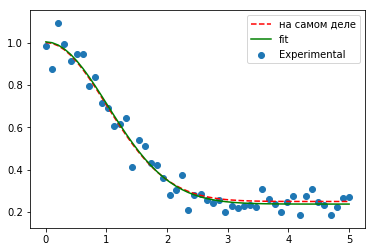

In [56]:
# на самом деле (без внесенных ошибок) точки должны быть такими:
y_theor = f(x, 0.25, 0.75, 0.5)

# подставим те b0, b1, b2 которые мы нашли
#y_lsq = f1(x, beta_opt)   # или так - передаем список
y_lsq = f(x, *beta_opt)   # или так - разворачиваем элементы списка

fig, ax = plt.subplots()
ax.scatter(x, y, label='Experimental')
ax.plot(x, y_theor, 'r--', label='на самом деле')
ax.plot(x, y_lsq, 'g-', label='fit')
ax.legend()
plt.show()